# MACD Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import ta


In [3]:
ticker="MSFT"
start_date="2020-01-01"
end_date="2025-05-10"

# Download historical data
data = yf.download(ticker, start=start_date, end=end_date,multi_level_index=False)
data.reset_index(inplace=True)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [5]:
display(data.head())

,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,153.323273,153.428276,151.137310,151.566865,22622100
2020-01-03,151.414093,152.683675,150.879535,151.127733,21116200
2020-01-06,151.805496,151.872323,149.399972,149.944085,20813700
2020-01-07,150.421402,152.416453,150.173219,152.082362,21634100
2020-01-08,152.817307,153.495059,150.774525,151.710000,27746500


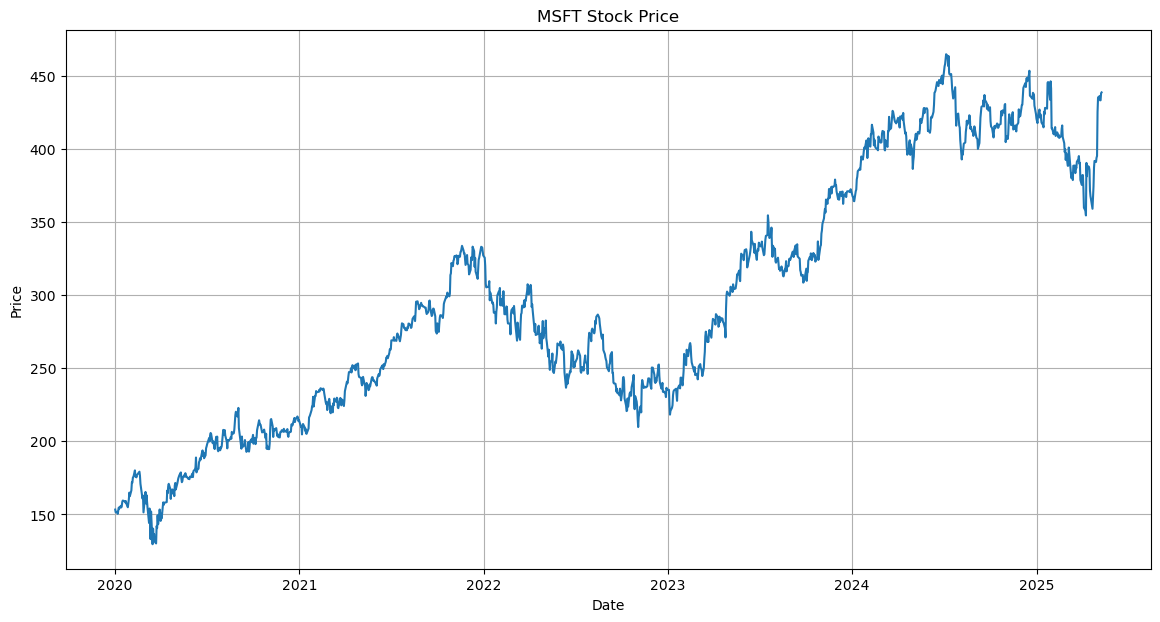

In [6]:
#plot the stock price
plt.figure(figsize=(14, 7))
plt.plot(data['Close'])
plt.title(f'{ticker} Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.show()

## Moving Average Convergence Divergence (MACD) หรือ MACD 
- คือเครื่องมือวิเคราะห์ทางเทคนิคที่ใช้ในการระบุแนวโน้มและโมเมนตัมของราคาหุ้นหรือสินทรัพย์อื่น ๆ MACD แสดงความสัมพันธ์ระหว่างค่าเฉลี่ยเคลื่อนที่ (Moving Average) สองเส้นของราคา โดยคำนวณจากความแตกต่างระหว่างค่าเฉลี่ยเคลื่อนที่เอ็กซ์โพเนนเชียล (Exponential Moving Average: EMA) ระยะสั้นและระยะยาว

### การคำนวณ MACD:

1. คำนวณ EMA ระยะสั้น (โดยทั่วไปคือ 12 วัน):
- EMA ระยะสั้น = EMA ของวันก่อนหน้า + [ค่าคงที่ × (ราคาปิดของวันนี้ - EMA ของวันก่อนหน้า)]
- ค่าคงที่ = 2 / (จำนวนวัน + 1) เช่น ถ้าใช้ 12 วัน ค่าคงที่ = 2 / (12 + 1) = 0.1538
2. คำนวณ EMA ระยะยาว (โดยทั่วไปคือ 26 วัน):
- EMA ระยะยาว = EMA ของวันก่อนหน้า + [ค่าคงที่ × (ราคาปิดของวันนี้ - EMA ของวันก่อนหน้า)]
- ค่าคงที่ = 2 / (จำนวนวัน + 1) เช่น ถ้าใช้ 26 วัน ค่าคงที่ = 2 / (26 + 1) = 0.0741
3. คำนวณ MACD Line:
- MACD Line = EMA ระยะสั้น - EMA ระยะยาว
4. คำนวณ Signal Line (โดยทั่วไปคือ 9 วัน):
- Signal Line = EMA ของ MACD Line (ใช้ EMA 9 วันของค่า MACD)
- Signal Line = EMA ของวันก่อนหน้า + [ค่าคงที่ × (MACD Line ของวันนี้ - EMA ของวันก่อนหน้า)]
- ค่าคงที่ = 2 / (จำนวนวัน + 1) เช่น ถ้าใช้ 9 วัน ค่าคงที่ = 2 / (9 + 1) = 0.2
5. คำนวณ MACD Histogram:
- MACD Histogram = MACD Line - Signal Line

### ส่วนประกอบของ MACD:

- MACD Line: เป็นเส้นที่แสดงความแตกต่างระหว่าง EMA ระยะสั้นและระยะยาว
- Signal Line: เป็น EMA ของ MACD Line ใช้เพื่อระบุสัญญาณซื้อขาย
- MACD Histogram: เป็นกราฟแท่งที่แสดงความแตกต่างระหว่าง MACD Line และ Signal Line


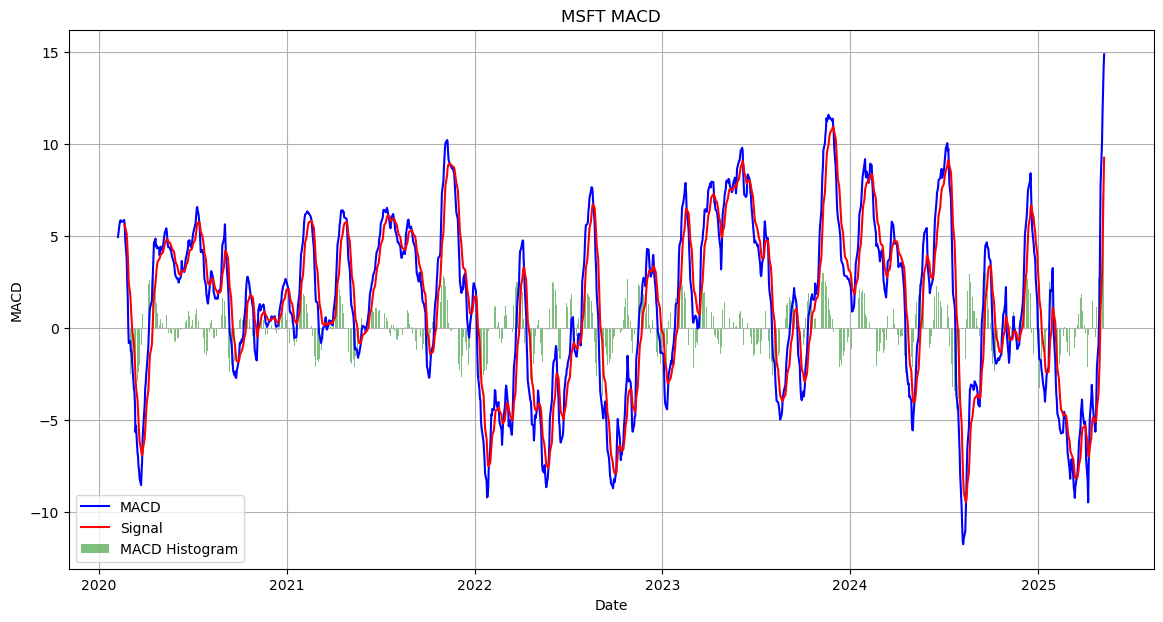

In [7]:
#Moving Average Convergence Divergence (MACD)
data['MACD'] = ta.trend.macd(data['Close'])
data['Signal'] = ta.trend.macd_signal(data['Close'])
data['MACD_Hist'] = ta.trend.macd_diff(data['Close'])
plt.figure(figsize=(14, 7))
plt.plot(data['MACD'], label='MACD', color='blue')
plt.plot(data['Signal'], label='Signal', color='red')
plt.bar(data.index, data['MACD_Hist'], label='MACD Histogram', color='green', alpha=0.5)
plt.title(f'{ticker} MACD')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.grid()
plt.show()

### การตีความ MACD:

- สัญญาณซื้อ: เมื่อ MACD Line ตัดขึ้นเหนือ Signal Line
- สัญญาณขาย: เมื่อ MACD Line ตัดลงต่ำกว่า Signal Line
- Divergence: เมื่อราคาทำจุดสูงสุดใหม่ แต่ MACD ไม่ทำจุดสูงสุดใหม่ (Bearish Divergence) อาจเป็นสัญญาณว่าแนวโน้มขาขึ้นกำลังอ่อนตัวลง หรือเมื่อราคาทำจุดต่ำสุดใหม่ แต่ MACD ไม่ทำจุดต่ำสุดใหม่ (Bullish Divergence) อาจเป็นสัญญาณว่าแนวโน้มขาลงกำลังอ่อนตัวลง
- Overbought/Oversold: เมื่อ MACD อยู่ในระดับสูงมาก อาจบ่งบอกถึงสภาวะ Overbought (ซื้อมากเกินไป) และเมื่อ MACD อยู่ในระดับต่ำมาก อาจบ่งบอกถึงสภาวะ Oversold (ขายมากเกินไป)